# Seaborn

* Seaborn yra duomenų vizualizacijos biblioteka. 
* Ji sukurta Matplotlib pagrindu.
* Stilistiškai kiek išbaigtesnė už Matplotlib.
* Labai gerai veikia su pandas DataFrame'ais.
* Labai plačiai naudojama duomenų analizėje.
* Dokumentaciją rasite [čia](https://seaborn.pydata.org/).

diegiasi *conda install seaborn*, arba *pip install seaborn*

C:\Users\DELL G5\AppData\Local\Temp\ipykernel_9184\3070797215.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


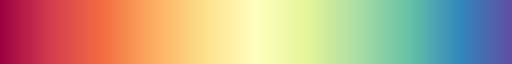

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
sns.color_palette("Spectral", as_cmap=True)

In [2]:
%matplotlib inline

Dažnai duomenų analizės bibliotekos turi integruotus dataset'us, demonstraciniams tikslams. Pasinaudokime vienu iš jų:

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.shape

(244, 7)

### Pasiskirstymo histogramos

Jų pagalba matysime, koks yra kokio nors vieno rodiklio pasiskirstymas.

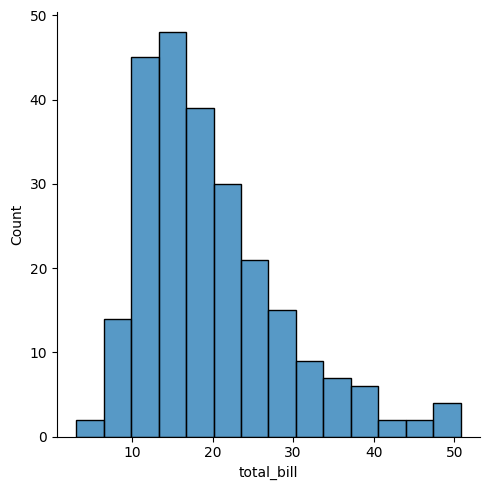

In [6]:
sns.displot(tips['total_bill'])

Parametras **bins** leidžia padidinti stulpelių skaičių.

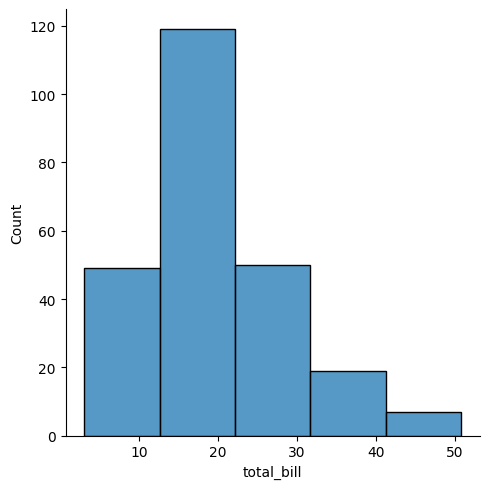

In [7]:
sns.displot(tips['total_bill'], bins=5)

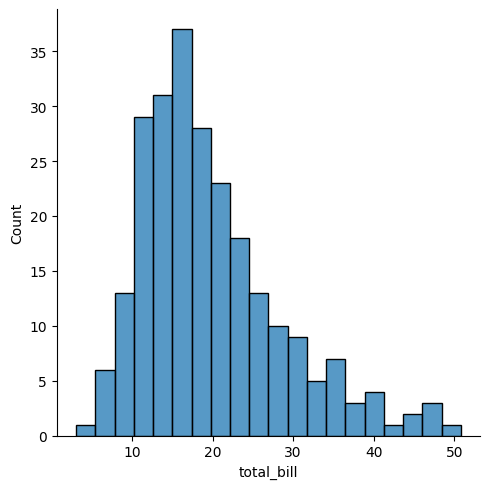

In [8]:
sns.displot(tips['total_bill'], kde=False, bins=20)

Matome kad dažniausiai sąskaitos išrašomos tarp 10 ir 20$.

In [9]:
tb_min = (tips['total_bill'])
tb_min

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [10]:
tb_max = (tips['total_bill'])
tb_max

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [11]:
bars = np.linspace(tb_min, tb_max, 6)
bars

NameError: name 'np' is not defined

In [ ]:
total_bill = tips['total_bill']
bar1 = total_bill[(total_bill >=bars[0]) & (total_bill < bars[1])]
bar2 = total_bill[(total_bill >=bars[1]) & (total_bill < bars[2])]

NameError: name 'bars' is not defined

### .jointplot()

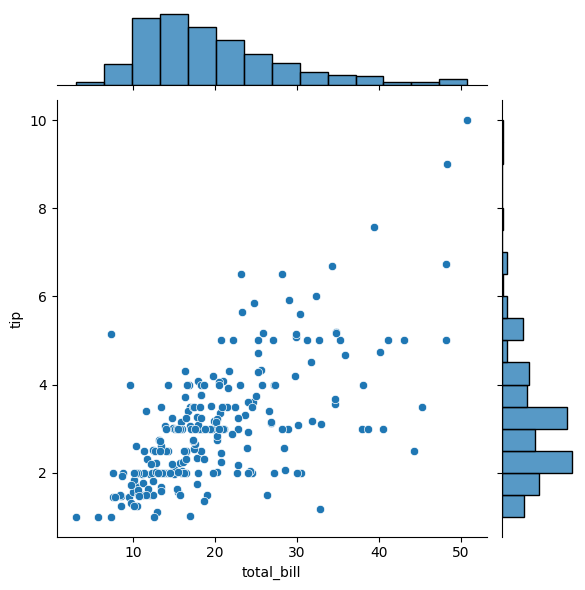

In [12]:
sns.jointplot(x='total_bill', y='tip', data=tips)

Matome, koks yra sąntykio tarp 'total_bill' ir 'tip' pasiskirstymas. Pagrindiniame lange yra sklaidos diagrama, o iš dešinės ir viršuje - tos pačios histogramos, iš kurių sukombinavome rezultatą.  

Rezultatą galime koreguoti su parametru **kind**:

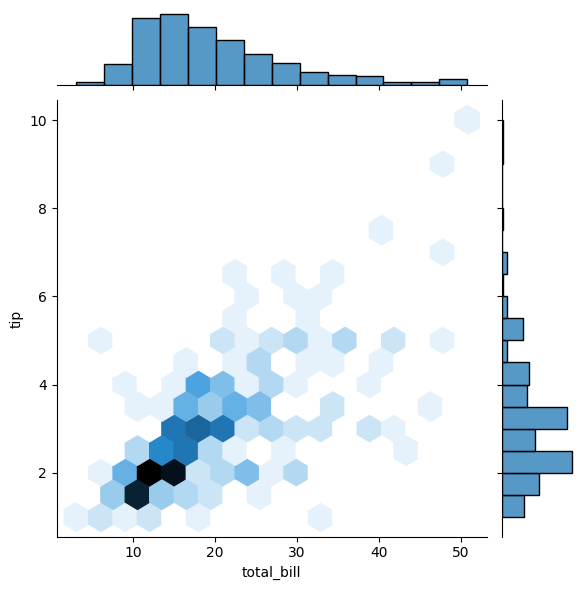

In [13]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

reikšmė 'reg' stengiasi nubrėžti mums liniją, kuri atspindėtų tendenciją.

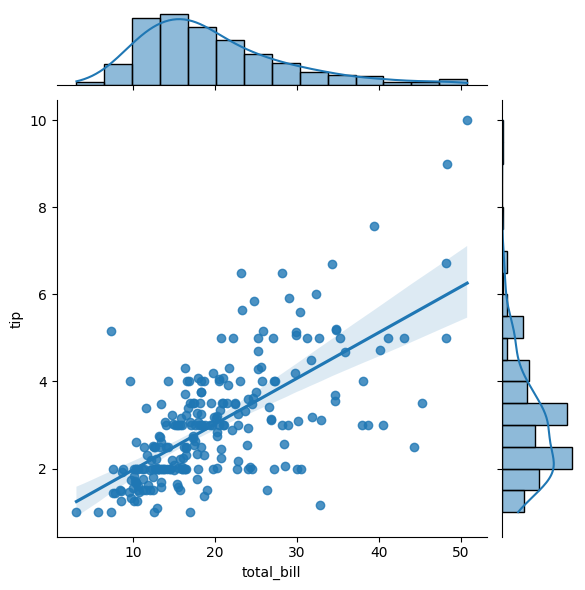

In [14]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

taip pat galime naudoti **kind** su 'kde' reikšme. Tokiu atveju matysime didžiausio tankio zonas:

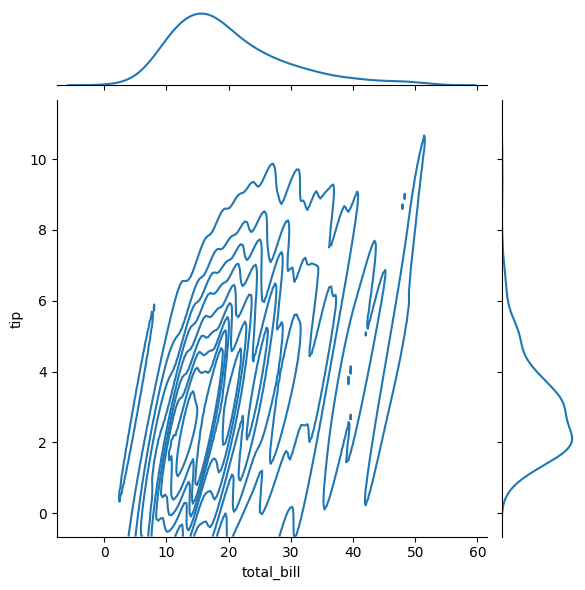

In [15]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')

### .scatterplot()
parametruose nurodžius ašis ir šaltinį, nubrėžia mums sklaidos diagramą.

<Axes: xlabel='tip', ylabel='total_bill'>

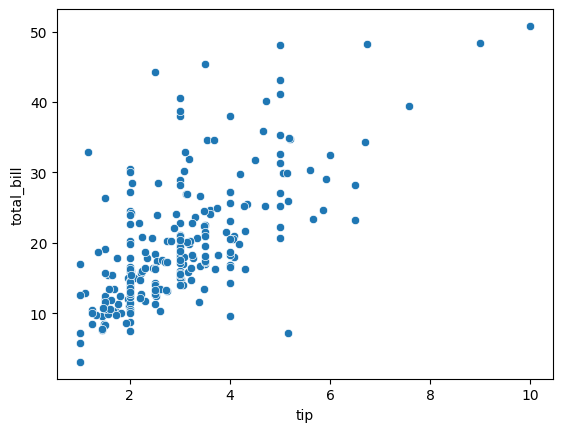

In [16]:
sns.scatterplot(x='tip', y='total_bill', data=tips)

Parametruose taip pat galima nurodyti **hue** ir **size** reikšmes:

<Axes: xlabel='tip', ylabel='total_bill'>

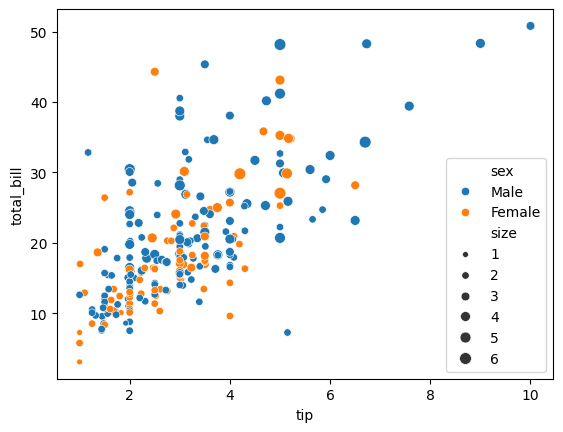

In [17]:
sns.scatterplot(x='tip', y='total_bill', data=tips, hue='sex', size='size')

### .pairplot()
duoda mums visas įmanomas pasiskirstymo kombinacijas lentelėje:

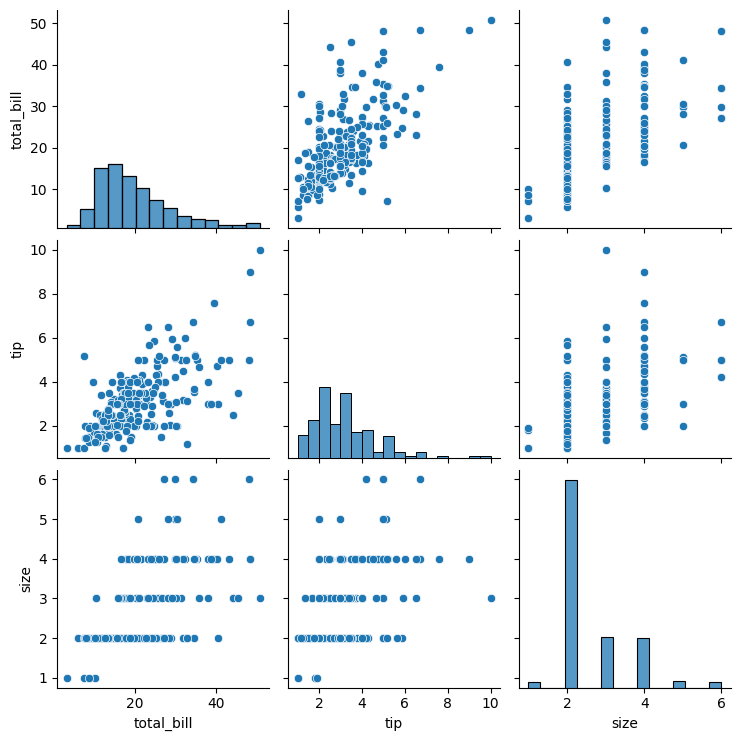

In [18]:
sns.pairplot(tips)

pvz, dešinys-apatinis grafikas yra ne kas kita, kaip:

<Axes: xlabel='total_bill', ylabel='size'>

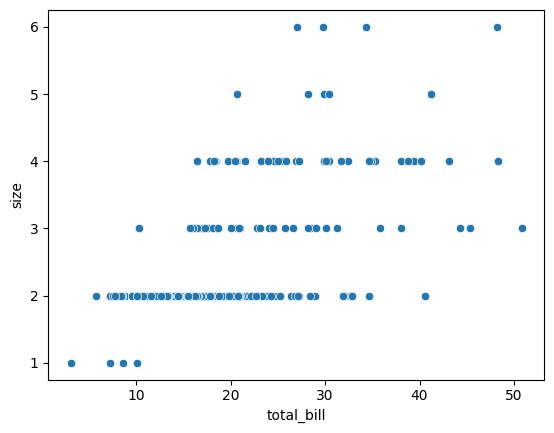

In [19]:
sns.scatterplot(x='total_bill', y='size', data=tips)

parametras **hue** išskiria kategorines reikšmes, o **diag_kind** šiuo atveju nurodo, kad įstrižainėje norime matyti ne linijas, o histogramas pvz.:

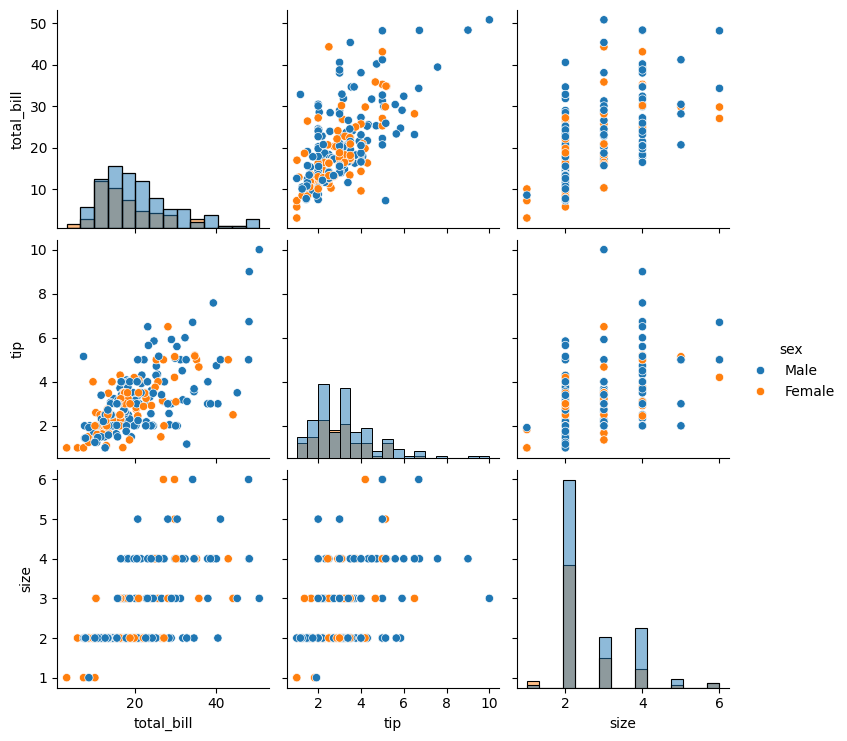

In [20]:
sns.pairplot(data=tips, hue='sex', diag_kind='hist')

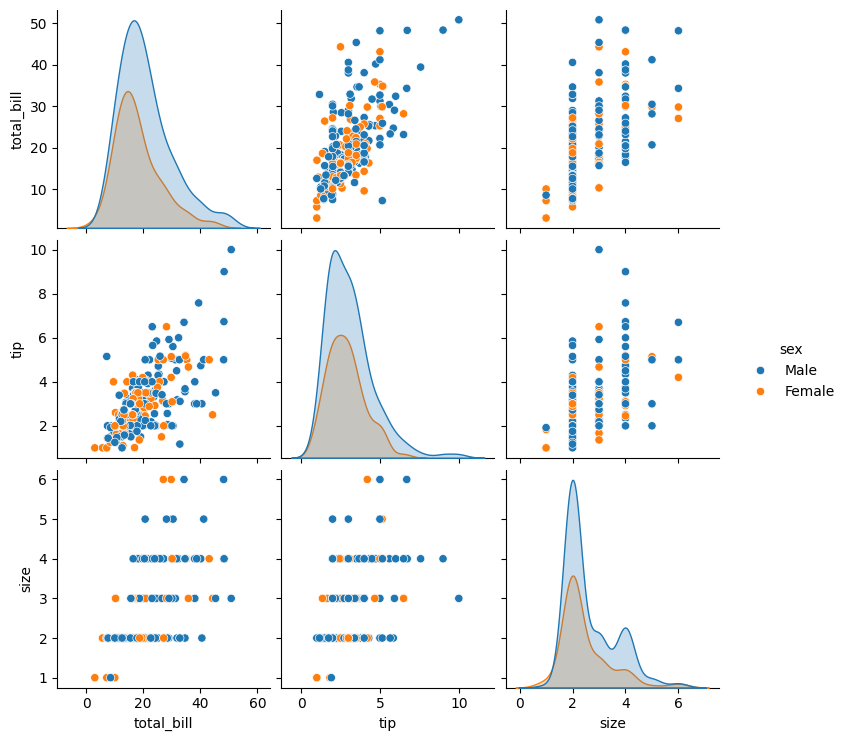

In [21]:
sns.pairplot(data=tips, hue='sex')

Turime skirtingų spalvų taškus, kur oranžinė spalva reprezentuoja moteris.

### Kategorizavimo histogramos

**.barplot()** išskirsto kategorijas pagal kurį nors rodiklį ir leidžia tam rodikliui taikyi kokią nors funkciją:

<Axes: xlabel='sex', ylabel='total_bill'>

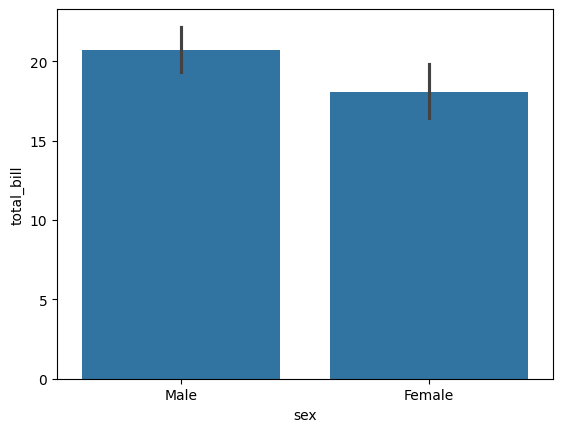

In [22]:
sns.barplot(x='sex', y='total_bill', data=tips)

<Axes: xlabel='sex', ylabel='total_bill'>

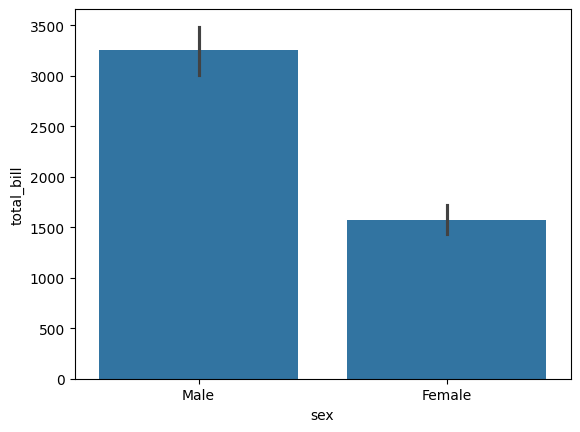

In [23]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=sum)

Jeigu mes nenurodome, kokia ta funkcija, numatyta reikšmė yra vidurkis. Taigi šiame pavyzdyje matome sąskaitos vidurkių pasiskirstymą tarp lyčių. Jeigu norime nurodyti vidurkį, turime naudoti **estimator** parametrą, pvz.:

<Axes: xlabel='sex', ylabel='total_bill'>

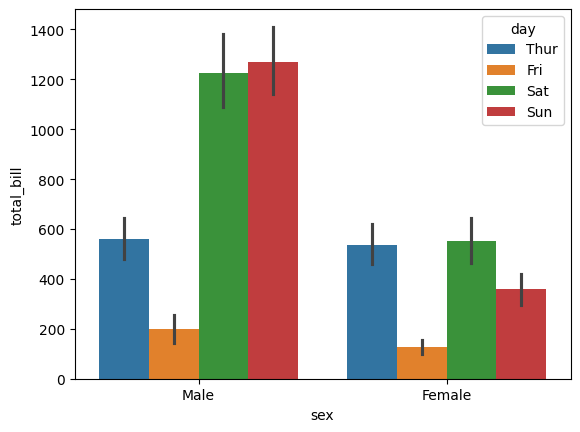

In [24]:
sns.barplot(x='sex', y='total_bill', data=tips, hue='day', estimator=sum)

Šiuo atveju matome bendras sumas. Taip pat panaudojome *hue*, tokiu būdu rezultatą išskirstydami savaitės dienomis. *Nekreipkite dėmesio į juodas linijas, jos yra error bars, rodo statistinį skaičiavimo patikimumą, ir nėra mums aktualios. Norint jas išjungti, parametruose nurodykite ci=False* 

### .countplot() tiesiog suskaičiuoja kategorijas:

<Axes: xlabel='smoker', ylabel='count'>

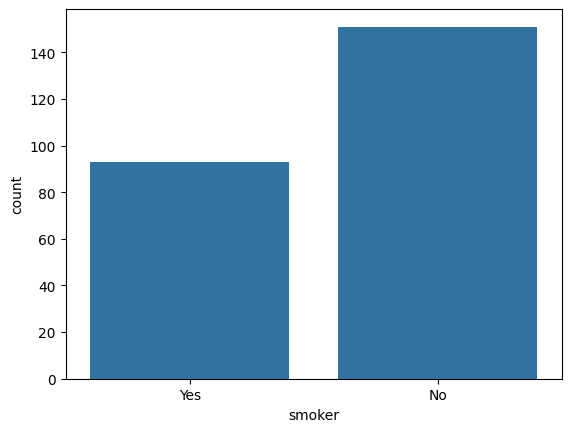

In [25]:
sns.countplot(x='smoker', data=tips)

In [26]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### .boxplot() - stačiakampės diagramos

<Axes: xlabel='smoker', ylabel='total_bill'>

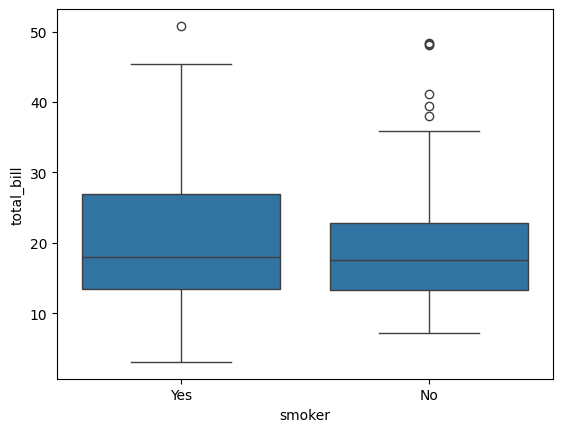

In [27]:
sns.boxplot(x='smoker', y='total_bill', data=tips)

Kas yra *boxplot* (stačiakampė diagrama)? Iš esmės tai į ketvirtadalius sugrupuota informacija. Mūsų pavyzdyje matosi, kad rūkalių viršutinis ketvirtadalis maistui išleido nuo ~28 iki ~46, kai tuo tarpu nerūkančiųjų viršutinis ketvirtadalis išleido nuo ~24 iki ~37. Taškai viršuje yra išimtys. Jie pasitaiko per retai, kad būtų įtraukti į ketvirtadalius.

![](http://web.pdx.edu/~stipakb/download/PA551/boxplot_files/boxplot4.jpg)

Šis paveikslėlis paaiškina boxplot atvaizdavimą.

### .heatmap() 

pandas turi metodą, kuris parodo skaičių koreliacijas lentelėje:

In [28]:
koreliacijos = tips.corr(numeric_only=True)

In [29]:
koreliacijos

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


čia turime koreliacijų matricą. Ji rodo, kaip skirtingi kintamieji tarpusavyje koreliuoja. Kad būtų lengviau skaityti, atsispausdinkime vizualizaciją (mozaikinę diagramą):

<Axes: >

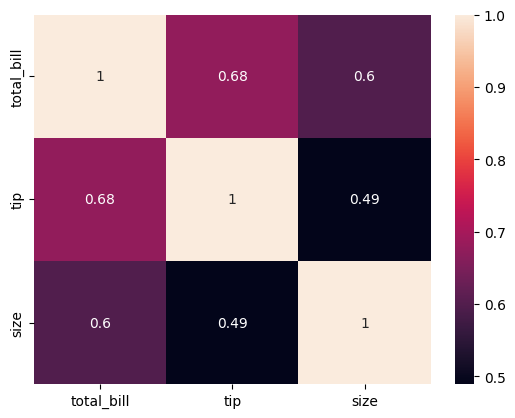

In [30]:
sns.heatmap(koreliacijos, annot=True)

### .FacetGrid()

**.FacetGrid()** leidžia susikurti tinklelį, kurį vėliau reikės užpildyti diagramomis. Pvz.:

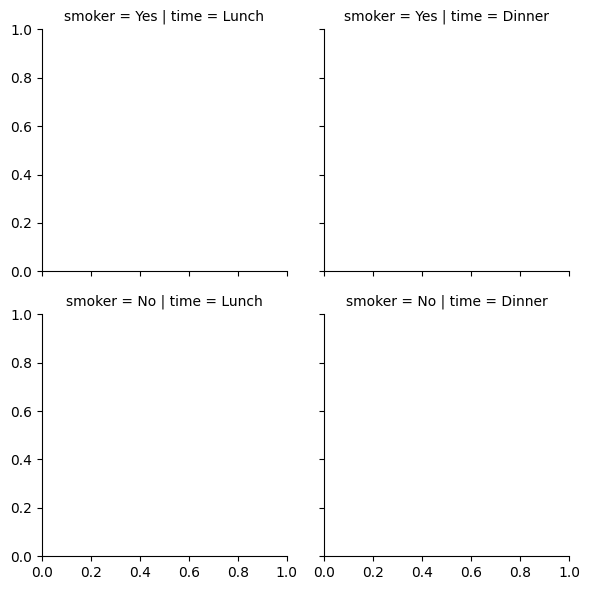

In [31]:
sns.FacetGrid(data=tips, col='time', row ='smoker')

O pats užpildymas atrodo taip:

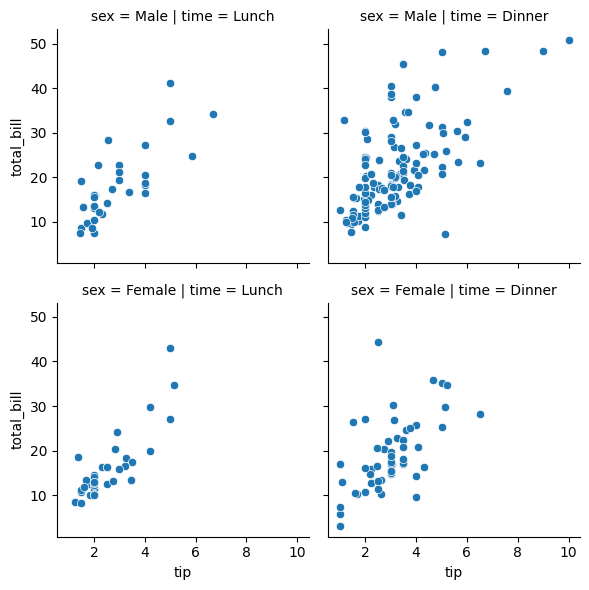

In [32]:
g = sns.FacetGrid(data = tips, col='time', row='sex')
g.map(sns.scatterplot, 'tip', 'total_bill')

Taip išskirstėme atvaizdavimą į keturias diagramas. Vienoje pavaizduotos moterys per pietus, kitoje moterys per vakarienę ir t.t.

### Stilius ir spalvos

### .set_style()

Seaborn leidžia nustatyti stilių su **.set_style()** metodu. Į parametrus reikia įkelti vieną iš šių reikšmių - darkgrid, whitegrid, dark, white, ticks.

<Axes: xlabel='sex', ylabel='total_bill'>

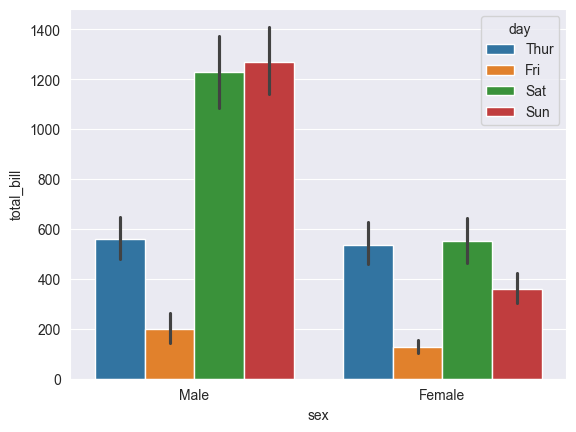

In [33]:
sns.set_style('darkgrid')
sns.barplot(x='sex', y='total_bill', data=tips, hue='day', estimator=sum)


### .despine()

Nuima viršutinį ir dešinį rėmą.

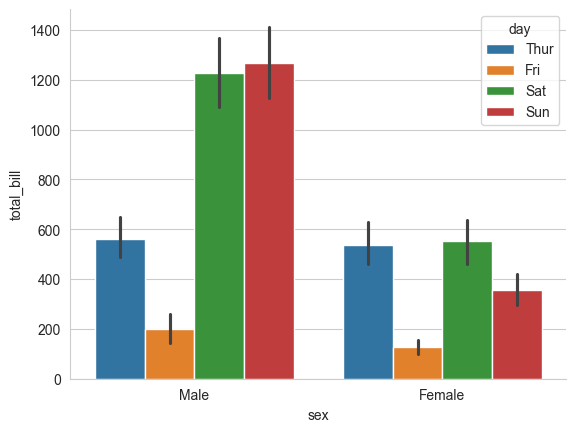

In [34]:
sns.set_style('whitegrid')
sns.barplot(x='sex', y='total_bill', data=tips, hue='day', estimator=sum)
sns.despine()

### palette parametras
leidžia pasirinkti vieną iš paruoštų naudoti spalvų palečių. Jas rasite [čia](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html#classes-of-colormaps). Kai kurie metodai nepriima parametro palette, tuomet reikia bandyti tas pačias reikšmes nurodyti į **cmap** parametrą

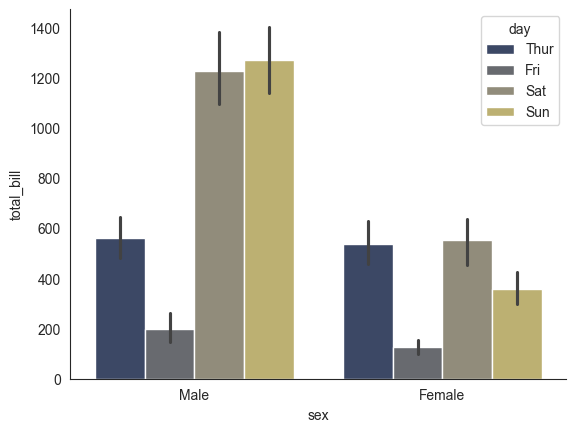

In [35]:
sns.set_style('white')
sns.barplot(x='sex', y='total_bill', data=tips, hue='day', estimator=sum, palette='cividis')
sns.despine()

Rekomendacija: pasitikrinti galimus įvairių metodų parametrus galite kursoriui mirksint skliaustelių viduje, spaudžiant *Shift+Tab*. Nevenkite eksperimentuoti :) 